In [1]:
import pandas as pd
import numpy as np
import os
import math as m
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True

In [2]:
FIGSIZE=(5,4)

In [3]:
UTILS={
    "COMP_RES": './results/compiled_results/',
    'DATASET': "Reuters30k",
    'TARGET_DIMS':[10,20,30,40],
    'DR_TECHS': ['DiffRed', 'PCA', 'RMap', 'S-PCA', 'K-PCA']
}

In [13]:
def plot(PLOT_DATA:dict, title:str, xlabel:str, ylabel:str, ci:bool=False, alpha=0.1, colormap:str='tab10', log_scale:bool=False, labels:list=None, figsize=FIGSIZE):
    plt.figure(figsize=figsize)
    if not ci:
        min_tick=1000
        fig, ax = plt.subplots()
        if log_scale:
            ax.set_yscale('log')
        cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))
        if colormap=='binary':
            cmap=('red', 'blue')
        # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            x = data['x']
            y = data['y']
            if colormap=='binary':
                color=cmap[i]
            else:
                color = cmap(i)
            if labels is not None:
                label=labels[i]
            else:
                label = f'{algorithm}'
            ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
        ax.set_title(title, fontsize=22)
        ax.set_xlabel(xlabel, fontsize=26)
        ax.tick_params(axis='x', labelsize=24)
        ax.set_ylabel(ylabel, fontsize=28)
        ax.tick_params(axis='y', labelsize=24)

        fig.legend(
            ncol=1, fancybox=True, shadow=True, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper right')
        plt.show()
    else:
        min_tick=1000
        fig, ax = plt.subplots()
        if log_scale:
            ax.set_yscale('log')
        cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))
        if colormap=='binary':
            cmap=('red', 'blue')
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            if algorithm!='RMap':
                x = data['x']
                y = data['y']
                if min(y)<min_tick:
                    min_tick=min(y)
                if colormap=='binary':
                    color=cmap[i]
                else:
                    color = cmap(i)
                if labels is not None:
                    label=labels[i]
                else:
                    label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
            else:
                x=np.array(data['x'])
                y=np.array(data['y'])
                std=np.array(data['std'])
                ci=1.96*std/np.sqrt(len(x))
                color = cmap(i)
                label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
                ax.fill_between(x, (y-ci), (y+ci), color='r', alpha=alpha)
        ax.set_title(title, fontsize=22)
        ax.set_xlabel(xlabel, fontsize=26)
        ax.tick_params(axis='x', labelsize=24)
        ax.set_ylabel(ylabel, fontsize=28)
        ax.tick_params(axis='y', labelsize=24)

        fig.legend(
            ncol=1, fancybox=True, shadow=True, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper right')
        plt.show()

#  Figure 3: $\Lambda_{M_1}$ vs $\rho(A)$ plot (RMap)

In [189]:
sr_path='./results/stable_rank.xlsx'
sr=pd.read_excel(sr_path)

In [190]:
stable_ranks=sr[['Dataset', 'Stable Rank']]
stable_ranks=stable_ranks.set_index('Dataset')['Stable Rank'].to_dict()

In [191]:
stable_ranks

{'Cifar10': 6.13130505901164,
 'Reuters30k': 14.50200643319319,
 'geneRNASeq': 1.11733969850836,
 'FMnist': 2.681504378944568,
 'Bank': 1.476372804463409,
 'hatespeech': 11.04257620674036}

In [192]:
stable_ranks['DIV2k']=8.39
stable_ranks['APTOS']=1.32

In [193]:
m1_vals={
    'Cifar10':0.09,
    'Reuters30k':0.03 ,
    'geneRNASeq':0.31 ,
    'FMnist': 0.11,
    'hatespeech': 0.06,
    'APTOS':0.24,
    'DIV2k':0.05,
}

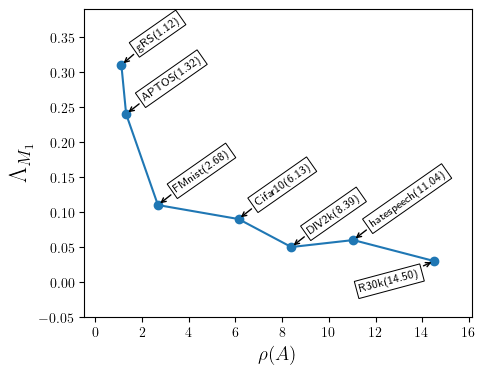

In [194]:
x,y,x_labels=[],[],[]

for key in m1_vals.keys():
    x.append(stable_ranks[key])
    y.append(m1_vals[key])
    if key=='geneRNASeq':
        x_labels.append(f'gRS({stable_ranks[key]:0.2f})')
    elif key=='Reuters30k':
        x_labels.append(f'R30k({stable_ranks[key]:0.2f})')
    else:
        x_labels.append(f'{key}({stable_ranks[key]:0.2f})')
    
x=np.array(x)
idx=np.argsort(x)
x=x[idx]
y=np.array(y)[idx]
x_labels=np.array(x_labels)[idx]
plt.figure(figsize=FIGSIZE)
plt.plot(x,y,marker='o', linestyle='-',markersize=6)
plt.xlabel(r'$\rho(A)$', fontsize=14)
plt.ylabel(r'$\Lambda_{M_1}$', fontsize=18)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90")
arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0")
kw = dict(xycoords='data',textcoords="offset points",
     arrowprops=arrowprops, bbox=bbox_props, fontsize=8)
for i, txt in enumerate(x_labels):
    if txt==f"gRS({stable_ranks['geneRNASeq']:0.2f})":
        plt.annotate(txt, (x[i],y[i]), xytext=(9,9), rotation= 35, ha='left', va='bottom', **kw)
    elif txt==f"R30k({stable_ranks['Reuters30k']:0.2f})":
        plt.annotate(txt, (x[i], y[i]), xytext=(-10,-5), rotation=15, ha='right', va='top', **kw)
    else:
        plt.annotate(txt, (x[i], y[i]), xytext=(10, 10), rotation=35,**kw)
# plt.xticks(x,x_labels, rotation=55, fontsize=10)
xmin, ymin = np.min(x), np.min(y)
xmax, ymax = np.max(x), np.max(y)
xmargin=1.6
ymargin = 0.08
plt.xlim(xmin-xmargin, xmax + xmargin)
plt.ylim(ymin-ymargin, ymax + ymargin)
plt.show()

# Figure 4: $\Lambda_{M_1}$ vs $d$ plot for RMap (Reuters30k)

In [5]:
DATASET='Reuters30k'
res_path=os.path.join(UTILS['COMP_RES'],'M1', 'RMap', f'{DATASET}.xlsx')
result_sheet=pd.read_excel(res_path)
results=result_sheet.set_index('Target Dimension')['M1'].to_dict()

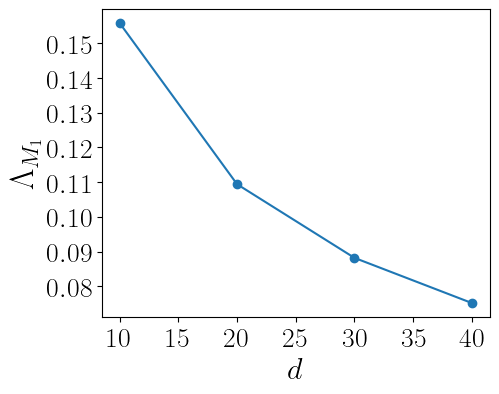

In [56]:
plt.figure(figsize=FIGSIZE)
x=np.array(list(results.keys()))
y=np.array(list(results.values()))
idx=np.argsort(x)
x=x[idx]
y=y[idx]
plt.plot(x,y,marker='o', linestyle='-', markersize=6)
plt.xlabel(r'$d$', fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel(r'$\Lambda_{M_1}$', fontsize=24)
plt.yticks(fontsize=20)
plt.show()

# Figure 5: Variation of exponent product $\left(\frac{k_2\rho(A^{*})}{(1-p)^2}\right)$ with $k_1$ for different stable ranks

In [11]:
from compute_stable_rank import stable_rank
from compute_theoretical_opt import calculate_p

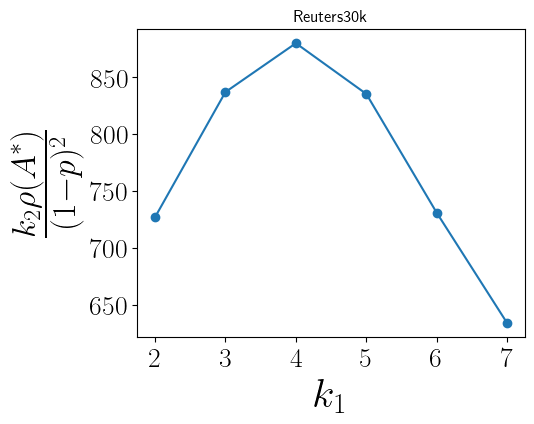

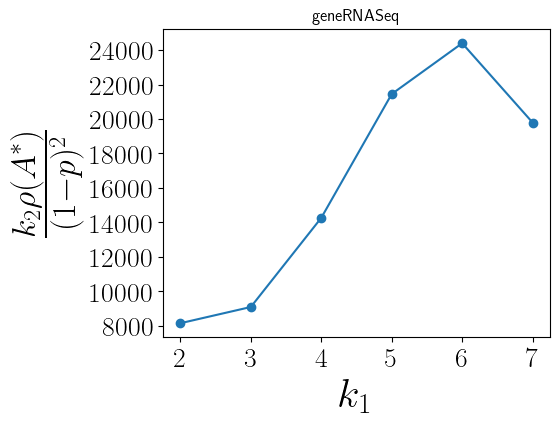

In [57]:
# NOTE: WE have not taken k1=0 because that corresponds to pure RMap. In this section, we're looking only at the product without taking into consideration the Monte-carlo iterations, therefore for this analysis, DiffRed with k1=0 is equivalent to pure RMap.
DATASETS=['Reuters30k', 'geneRNASeq']
SING_DIR='./norm_singular_values/'
target_dimensions=[10]
k1_vals={
    'Reuters30k': [[2,3,4,5,6,7],[2,4,5,8,10,12,15,18],[2,3,5,8,10,12,15,18,20,25,27],[2,4,5,8,10,15,16,20,25,30,35]],
    'geneRNASeq':[[2,3,4,5,6,7],[2,4,5,6,8,10,12,15,18],[3,5,8,10,12,15,18,20,25,27],[4,5,8,10,15,16,20,25,30,35]]
}

sr_path='./results/stable_rank.xlsx'
sr=pd.read_excel(sr_path)
stable_ranks=sr[['Dataset', 'Stable Rank']]
stable_ranks=stable_ranks.set_index('Dataset')['Stable Rank'].to_dict()
stable_ranks={key:stable_ranks[key] for key in DATASETS}

for dataset in DATASETS:
    plt.figure(figsize=FIGSIZE)
    sigma=np.load(os.path.join(SING_DIR,f'{dataset}.npy'))
    for i in range(len(target_dimensions)):
        k1=np.array(k1_vals[dataset][i])
        target_dim=target_dimensions[i]
        k2=target_dim-k1
        x=k1
        res_sr=np.array([stable_rank(sigma[k:]) for k in k1])
        p=np.array([calculate_p(sigma,k) for k in k1])

        y=k2*res_sr/(1-p)**2
        plt.plot(x,y, marker='o', linestyle='-', markersize=6)
    plt.xlabel(r'$k_1$', fontsize=30)
    plt.xticks(fontsize=20)
    plt.ylabel(r'$\frac{k_2\rho(A^{*})}{(1-p)^2}$', fontsize=35)
    plt.yticks(fontsize=20)
    plt.title(f'{dataset}')
    plt.show()
    plt.close() 

# Figure 6: Stress for RMap

In [59]:
DATASETS=['geneRNASeq', 'Reuters30k']

PLOT_DATA={}
for DATASET in DATASETS:
    res_path=os.path.join(UTILS['COMP_RES'],'Stress','RMap', f'{DATASET}.xlsx')

    results_df=pd.read_excel(res_path)
    results=results_df.set_index('Target Dimension').to_dict()
    x=np.array(list(results['Stress'].keys()))
    y=np.array(list(results['Stress'].values()))
    stdev=np.array(list(results['stdev'].values()))
    idx=np.argsort(x)
    x,y,stdev=x[idx],y[idx],stdev[idx]
    PLOT_DATA[DATASET]={'x':x, 'y':y,'stdev':stdev}

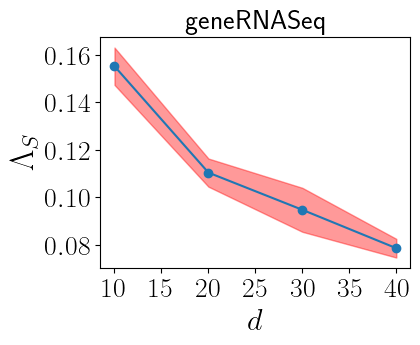

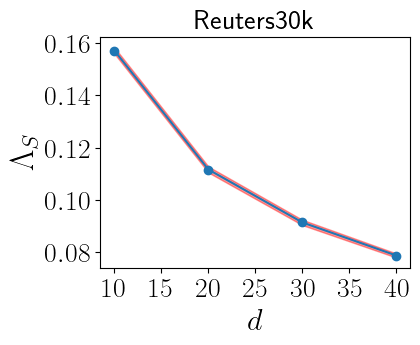

In [60]:
for key in PLOT_DATA.keys():
    x=PLOT_DATA[key]['x']
    y=PLOT_DATA[key]['y']
    ci=1.96*PLOT_DATA[key]['stdev']/np.sqrt(len(y))
    plt.figure(figsize=(4,3))
    plt.plot(x,y,marker='o', markersize=6, linestyle='-')
    plt.fill_between(x, (y-ci), (y+ci), color='r', alpha=0.4)
    plt.title(key, fontsize=20)
    plt.xlabel(r'$d$', fontsize=22)
    plt.xticks(fontsize=20)
    plt.ylabel(r'$\Lambda_S$', fontsize=24)
    plt.yticks(fontsize=20)
    plt.show()
    plt.close()

# Figure 7: $\Lambda_{S}$ plots for PCA

In [9]:
DATASETS=['geneRNASeq', 'Reuters30k']

PLOT_DATA={}
for DATASET in DATASETS:
    res_path=os.path.join(UTILS['COMP_RES'],'Stress','PCA', f'{DATASET}.xlsx')

    results_df=pd.read_excel(res_path)
    results=results_df.set_index('Target Dimension')['Stress'].to_dict()
    x=np.array(list(results.keys()))
    y=np.array(list(results.values()))
    idx=np.argsort(x)
    x,y=x[idx],y[idx]
    PLOT_DATA[DATASET]={'x':x, 'y':y}

/tmp/ipykernel_6953/1052101203.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))


<Figure size 150x100 with 0 Axes>

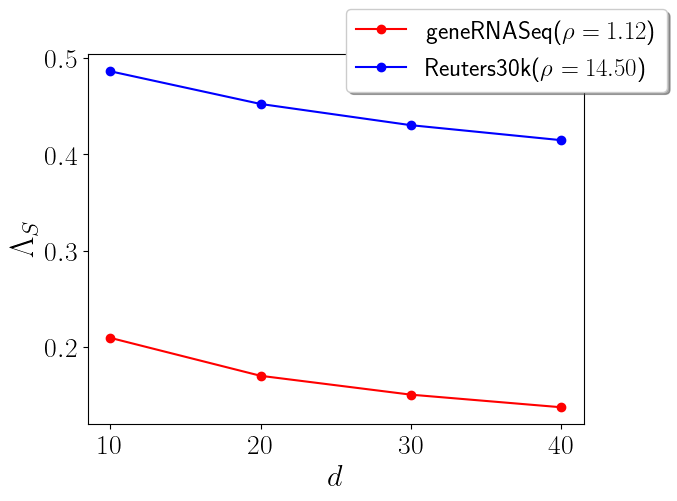

In [14]:
labels=[r'geneRNASeq($\rho=1.12$)', r'Reuters30k($\rho=14.50$)']
plot(PLOT_DATA, '', r'$d$', r'$\Lambda_S$', False, None,'binary',False, labels, figsize=(1.5,1))

# Figure 8: $\Lambda_S$ for <i>DiffRed</i>

In [65]:
DATASETS=['geneRNASeq', 'Reuters30k']

PLOT_DATA={}
for DATASET in DATASETS:
    res_path=os.path.join(UTILS['COMP_RES'],'Stress','DiffRed', f'{DATASET}.xlsx')

    results_df=pd.read_excel(res_path)
    results=results_df.set_index('Target Dimension')['Stress'].to_dict()
    x=np.array(list(results.keys()))
    y=np.array(list(results.values()))
    idx=np.argsort(x)
    x,y=x[idx],y[idx]
    PLOT_DATA[DATASET]={'x':x, 'y':y}

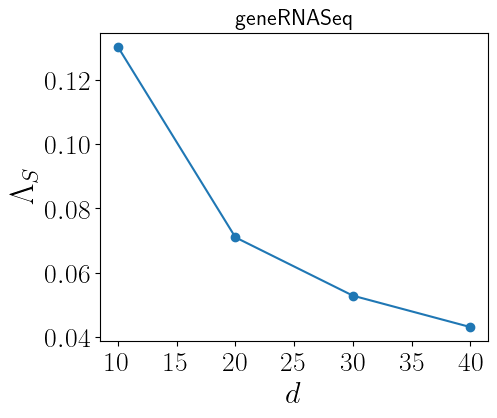

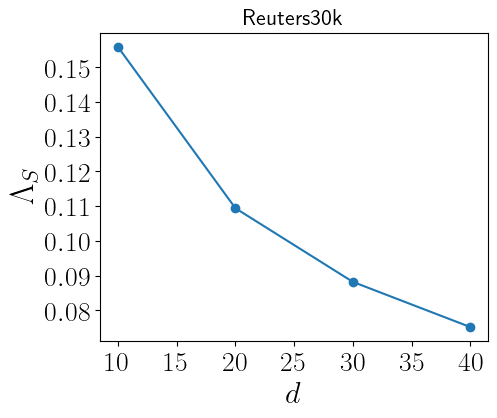

In [66]:
for key in PLOT_DATA.keys():
    x=PLOT_DATA[key]['x']
    y=PLOT_DATA[key]['y']
    plt.figure(figsize=FIGSIZE)
    plt.plot(x,y,marker='o', markersize=6, linestyle='-')
    plt.title(key,fontsize=16)
    plt.xlabel(r'$d$', fontsize=22)
    plt.xticks(fontsize=20)
    plt.ylabel(r'$\Lambda_S$', fontsize=24)
    plt.yticks(fontsize=20)
    plt.show()
    plt.close()

# Figure 9: Theoretical Bound vs Empirical Results

## Figure 9a: M1

In [67]:
from compute_bound_values import calculate_stress_bound
from compute_stable_rank import stable_rank
from compute_theoretical_opt import calculate_p


In [68]:
def calculate_m1_bound(sigma:np.ndarray, k1:int, target_dim:int, residual_sr):
    p=calculate_p(sigma,k1)
    k2=target_dim-k1
    return (1-p)/np.sqrt(k2*residual_sr)

In [69]:
METRIC='M1'
DATASET='Cifar10'
SING_DIR='./norm_singular_values/'
sigma=np.load(os.path.join(SING_DIR, f'{DATASET}.npy'))
target_dims=np.array([10,20,30,40])
k1=np.array([6,8,15,35])
bound_vals=[]
for i in range(len(target_dims)):
    r_sr=stable_rank(sigma[k1[i]:])
    bound_vals.append(calculate_m1_bound(sigma,k1[i],target_dims[i],r_sr))

m1_df=pd.read_excel(os.path.join(UTILS['COMP_RES'], METRIC, 'DiffRed', f'{DATASET}.xlsx'))
m1_dict=m1_df.set_index('Target Dimension')['M1'].to_dict()
keys=np.array(list(m1_dict.keys()))
idx=np.argsort(keys)
m1_vals=np.array(list(m1_dict.values()))[idx]
idx2=np.where(keys!=15)
keys=keys[idx2]
m1_vals=m1_vals[idx2]

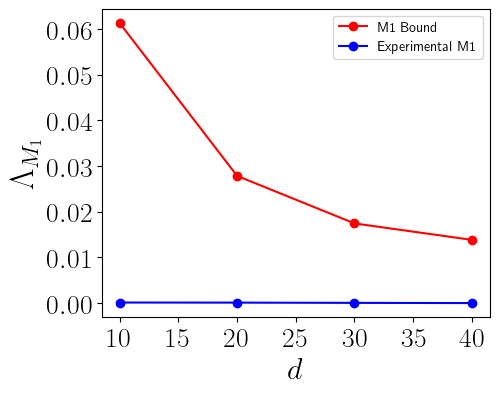

In [70]:
plt.figure(figsize=FIGSIZE)
plt.plot(target_dims, bound_vals, label='M1 Bound', color='red', marker='o', markersize=6, linestyle='-')
plt.plot(target_dims, m1_vals, label='Experimental M1', color='blue', marker='o', markersize=6, linestyle='-')
plt.xlabel(r'$d$', fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel(r'$\Lambda_{M_1}$', fontsize=24)
plt.yticks(fontsize=20)
plt.legend()
plt.show()
plt.close()

## Figure 9b: Stress

In [71]:
METRIC='Stress'
DATASET='Cifar10'
SING_DIR='./norm_singular_values/'
sigma=np.load(os.path.join(SING_DIR, f'{DATASET}.npy'))
target_dims=np.array([10,20,30,40])
k1=np.array([3,8,15,20])
bound_vals=[]
for i in range(len(target_dims)):
    # r_sr=stable_rank(sigma[k1[i]:])
    # bound_vals.append(calculate_m1_bound(sigma,k1[i],target_dims[i],r_sr))
    bound_vals.append(calculate_stress_bound(sigma,target_dims[i],k1[i]))

stress_df=pd.read_excel(os.path.join(UTILS['COMP_RES'], METRIC, 'DiffRed', f'{DATASET}.xlsx'))
stress_dict=stress_df.set_index('Target Dimension')[METRIC].to_dict()
keys=np.array(list(stress_dict.keys()))
idx=np.argsort(keys)
stress_vals=np.array(list(stress_dict.values()))[idx]
idx2=np.where((keys!=15) & (keys!=100)) 
keys=keys[idx2]
stress_vals=stress_vals[idx2]

In [72]:
bound_vals

[0.30890586386236896,
 0.20408318636617237,
 0.16282291626364243,
 0.13228703791949548]

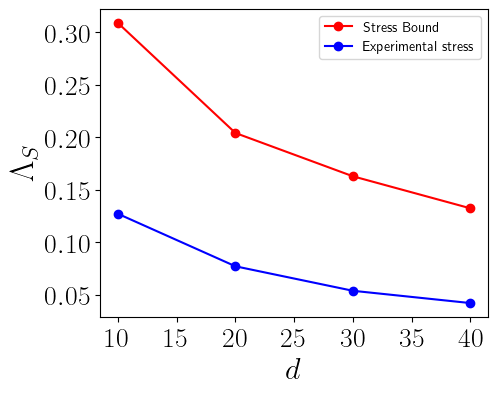

In [73]:
plt.figure(figsize=FIGSIZE)
plt.plot(target_dims, bound_vals, label='Stress Bound', color='red', marker='o', markersize=6, linestyle='-')
plt.plot(target_dims, stress_vals, label='Experimental stress', color='blue', marker='o', markersize=6, linestyle='-')
plt.xlabel(r'$d$', fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel(r'$\Lambda_{S}$', fontsize=24)
plt.yticks(fontsize=20)
plt.legend()
plt.show()
plt.close()

# Figure 10: Theoretical Minima vs Experimental Minima for stress

In [74]:
target_dims=[10,15,20,30,40,100]
th_min=[0.130287,0.100129, 0.080418, 0.056502,0.045487,0.018134 ]
exp_min=[0.127005,0.093779,0.076988,0.053645,0.041934,0.017179]

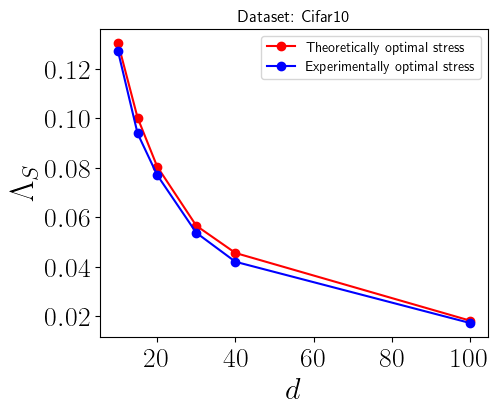

In [75]:
plt.figure(figsize=FIGSIZE)
plt.plot(target_dims, th_min, label='Theoretically optimal stress', color='red', marker='o', markersize=6, linestyle='-')
plt.plot(target_dims, exp_min, label='Experimentally optimal stress', color='blue', marker='o', markersize=6, linestyle='-')
plt.xlabel(r'$d$', fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel(r'$\Lambda_{S}$', fontsize=24)
plt.yticks(fontsize=20)
plt.title('Dataset: Cifar10')
plt.legend()
plt.show()
plt.close()

# Supplementary Material Plots

## Figure 5: Monte Carlo Experiment Plots

In [216]:
DATASET='hatespeech'

### Fig. 5a: M1

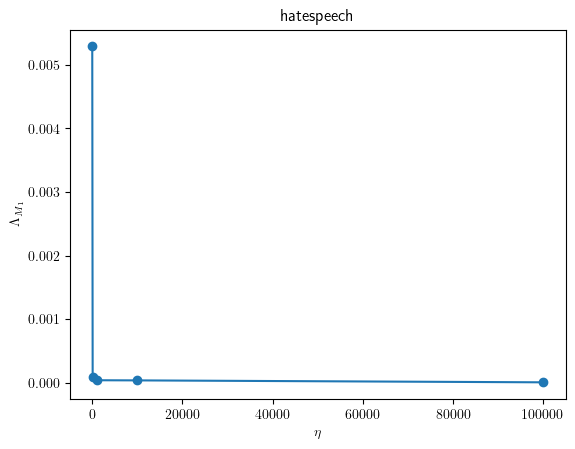

In [217]:
eta_vals=[10,100,1000,10000,100000]
m1_vals=[0.005290345, 9.89116e-05, 4.30879e-05, 4.08758e-05, 1.04629e-05]

plt.plot(eta_vals, m1_vals, marker='o', linestyle='-', markersize=6)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\Lambda_{M_1}$')
plt.title(DATASET)
plt.show()
plt.close()

### Fig 5b: Stress

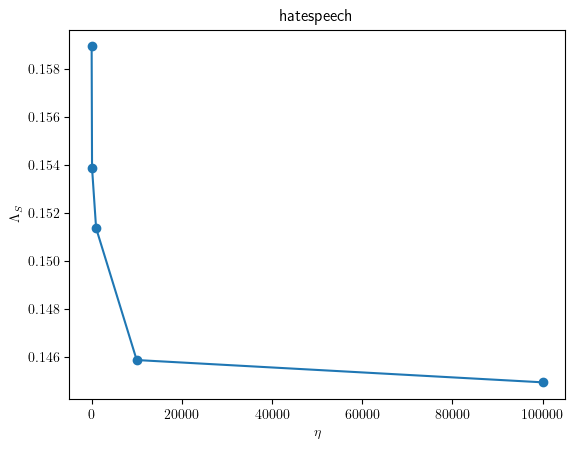

In [218]:
eta_vals=[10,100,1000,10000,100000]
stress_vals=[0.158954638, 0.153870036, 0.151364611, 0.14585947, 0.144929222]

plt.plot(eta_vals, stress_vals, marker='o', linestyle='-', markersize=6)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\Lambda_{S}$')
plt.title(DATASET)
plt.show()
plt.close()